## **🔧 Library Imports**

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Loading**

In [2]:
customer_data=pd.read_csv(r"C:\Users\adithyan s\Downloads\Mall_Customers.csv")
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Total columns
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
# Total rows and columns in the dataset
customer_data.shape

(200, 5)

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **EDA**

In [6]:
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer_data.duplicated().sum()

0

In [8]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Spliting data for clustering**

In [10]:
x=customer_data[['Annual Income (k$)','Spending Score (1-100)']].values

In [11]:
x.shape

(200, 2)

In [12]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# **select number of cluster based on elbow point**

In [13]:
wcs=[]
for k in range(1,11):
    Kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    Kmeans.fit(x_scaled)
    wcs.append(Kmeans.inertia_)

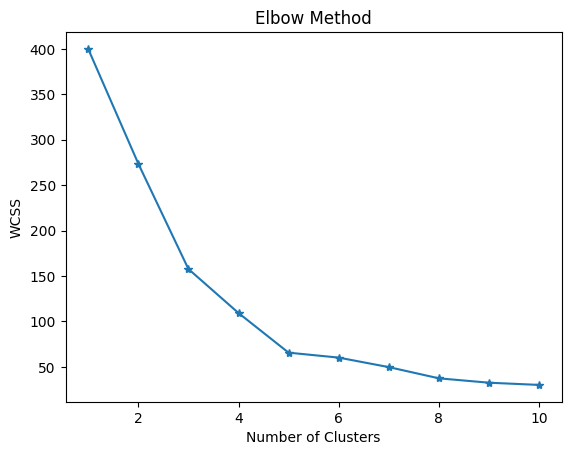

In [14]:
plt.plot(range(1, 11), wcs,marker='*')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [15]:
# optimal number of cluestring is   5

# **Apply K-Means**

In [16]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
customer_data['cluesters']=kmeans.fit(x_scaled)


In [17]:
# labeling the cluesters

In [18]:
y=kmeans.predict(x_scaled)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# **Visualizing the clusters**


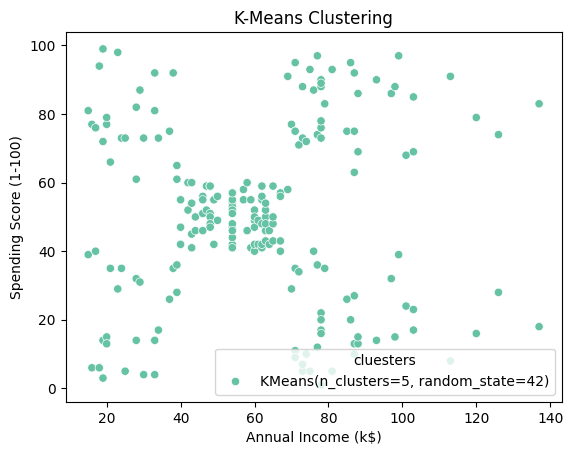

In [19]:
import seaborn as sns

sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluesters',
    data=customer_data,
    palette='Set2'
)
plt.title("K-Means Clustering")
plt.show()


# **Apply HIERARCHICAL CLUSTERING**


In [20]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
customer_data['Hierarchical_Cluster'] = hc.fit_predict(x_scaled)


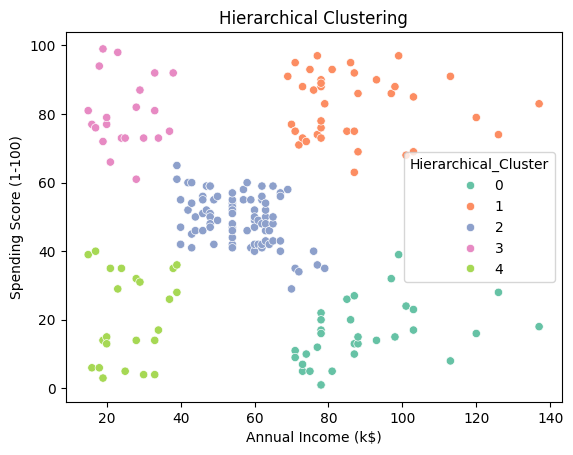

In [21]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Hierarchical_Cluster',
    data=customer_data,
    palette='Set2'
)
plt.title("Hierarchical Clustering")
plt.show()


In [22]:
z=hc.fit_predict(x_scaled)
z

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

# **evaluation of cluesters using silhoutte_score**

In [23]:
# kmean

In [24]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x_scaled, y)
print("Silhouette Score of kmeans:", score)


Silhouette Score of kmeans: 0.5546571631111091


In [25]:
# herarichal

In [26]:
score = silhouette_score(x_scaled, z)
print("Silhouette Score of herarical :", score)

Silhouette Score of herarical : 0.5538089226688662


# K-Means is the best clustering algorithm for this dataset 
# because it has the highest silhouette score and produces well-separated, interpretable clusters.

In [27]:
customer_data['Cluster'] = kmeans.labels_


In [28]:
customer_data['Cluster'].value_counts()


Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

In [29]:
for i in range(0,5):
    print(f"\nCluster {i}")
    print(customer_data[customer_data['Cluster'] == i].describe()[['Annual Income (k$)', 'Spending Score (1-100)']]	)




Cluster 0
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
std              8.988109                6.530909
min             39.000000               34.000000
25%             48.000000               44.000000
50%             54.000000               50.000000
75%             62.000000               55.000000
max             76.000000               61.000000

Cluster 1
       Annual Income (k$)  Spending Score (1-100)
count           39.000000               39.000000
mean            86.538462               82.128205
std             16.312485                9.364489
min             69.000000               63.000000
25%             75.500000               74.500000
50%             79.000000               83.000000
75%             95.000000               90.000000
max            137.000000               97.000000

Cluster 2
       Annual Income (k$)  Spending Score (1-100)
count           2

In [30]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluesters', 'Hierarchical_Cluster',
       'Cluster'],
      dtype='object')

## **KEY KPIs FOR K-MEANS CLUSTER ANALYSIS**

In [33]:
customer_data['Cluster'].value_counts().sort_values(ascending=False)

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

AVERAGE INCOME PER EACH CLUSTER

In [35]:
customer_data.groupby('Cluster')['Annual Income (k$)'].mean()

Cluster
0    55.296296
1    86.538462
2    25.727273
3    88.200000
4    26.304348
Name: Annual Income (k$), dtype: float64

Average Spending Score per Cluster 

In [40]:
customer_data.groupby('Cluster')['Spending Score (1-100)'].mean()


Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64

Age Profile per Cluster

In [45]:
customer_data.groupby('Cluster')['Age'].mean().round()

Cluster
0    43.0
1    33.0
2    25.0
3    41.0
4    45.0
Name: Age, dtype: float64

gender distribution my clusters

In [46]:
pd.crosstab(customer_data['Cluster'], customer_data['Gender'], normalize='index') * 100


Gender,Female,Male
Cluster,,
0,59.259259,40.740741
1,53.846154,46.153846
2,59.090909,40.909091
3,45.714286,54.285714
4,60.869565,39.130435


Clustering centroids

In [49]:
kmeans.cluster_centers_


array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])